In [1]:
from tensorflow import keras
import numpy as np
import cv2 as cv
from sklearn.svm import SVC

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [23]:
accuracies = []

In [21]:
# dst = cv.cornerHarris(gray,2,3,0.04) will give 
def detect_corners(threshold_parameter):
    c=0
    l = []
    i = 0
    outputs = []
    while i<20000:
        gray = np.float32(X_train[i])
        dst = cv.cornerHarris(gray,2,3,threshold_parameter)
        l.append(dst)
        if y_train[i] == 0:
            outputs.append(0)
        else:
            outputs.append(1)
        i+=1
    return l,outputs

In [22]:
def filtered_features(l):
    i = 0
    dic_list = []
    while i<20000:
        l1 = []
        j = 0
        while j<28:
            l1.append(l[i][j][j])
            j+=1
        dic_list.append(l1)
        i+=1
    return dic_list

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(dic_list)

In [8]:
y_tdf = np.array(outputs)

In [9]:
model = SVC(kernel='rbf')

In [10]:
model.fit(df,y_tdf)

SVC()

In [11]:
i = 0
l = []
outputs = []
while i<10000:
    gray = np.float32(X_test[i])
    dst = cv.cornerHarris(gray,2,3,0.04)
    l.append(dst)
    if y_test[i] == 0:
        outputs.append(0)
    else:
        outputs.append(1)
    i+=1

In [12]:
i = 0
dic_list = []
while i<10000:
    l1 = []
    j = 0
    while j<28:
        l1.append(l[i][j][j])
        j+=1
    dic_list.append(l1)
    i+=1

In [29]:
df_test= pd.DataFrame(dic_list)

In [30]:
y_testdf = np.array(outputs)

In [32]:
var = model.score(df_test,y_testdf)

In [33]:
t = (0.04,var)

In [34]:
accuracies.append(t)

In [36]:
l,outputs = detect_corners(0.05)

In [37]:
dic_list = filtered_features(l)

In [38]:
df = pd.DataFrame(dic_list)

In [39]:
y_traindf = np.array(outputs)

In [41]:
model.fit(df,y_traindf)

SVC()

In [43]:
var = model.score(df_test,y_testdf)

In [44]:
t = (0.05,var)

In [45]:
accuracies.append(t)

In [46]:
l,outputs = detect_corners(0.06)
dic_list = filtered_features(l)

In [47]:
df = pd.DataFrame(dic_list)
y_traindf = np.array(outputs)

In [48]:
model.fit(df,y_traindf)

SVC()

In [49]:
var = model.score(df_test,y_testdf)

In [51]:
t = (0.06,var)
accuracies.append(t)

In [53]:
#three thresold values now a bar graph

In [54]:
import matplotlib.pyplot as plt

In [62]:
x = [accuracies[0][0],accuracies[1][0],accuracies[2][0]]
y = [accuracies[0][1],accuracies[1][1],accuracies[2][1]]

<BarContainer object of 3 artists>

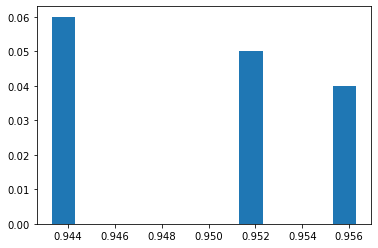

In [70]:
plt.bar(y,x,align='center',width=(x[1]-x[0])*0.1)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
y_pred = model.predict(df_test)

In [79]:
class_names = ['digit_0','not_digit_0']

In [77]:
from sklearn.metrics import plot_confusion_matrix

Confusion matrix, without normalization
[[ 482  498]
 [  64 8956]]
Normalized confusion matrix
[[0.49183673 0.50816327]
 [0.00709534 0.99290466]]


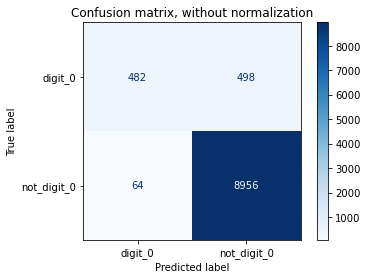

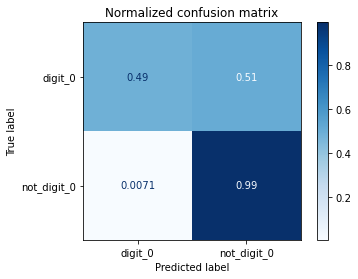

In [80]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, df_test, y_testdf,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)